Датасет представлен тремя файлами, расположенными в папке Data, которые содержат следующую информацию:
- **Injection wells.xlsx**, файл содержит информацию о нагнетательных скважинах, а именно их приемистость на каждый из дней, а также пластовое давление и размер штуцера для некоторых из них
- **Production_wells_train.xlsx**, файл содержит информацию о добывающих скважинах, объемы добытых жидкости и нефти, а также информацию по пластовым и забойным давлениям.
- **Well_coordinates.xlsx**, файл содержит информацию о координатах пластопересечений для всех скважин

In [1]:
# imports
import pandas as pd
from path import Path
import missingno as msno
import matplotlib.pyplot as plt
from math import isnan
import numpy as np

In [2]:
path_to_raw_data = Path.joinpath("..",
    "data", "raw"
)

path_to_processed_data = Path.joinpath("..",
    "data", "processed"
)


In [3]:
df_inj = pd.read_excel(Path.joinpath(path_to_raw_data, "Injection_wells.xlsx"))
df_inj['group'] = 'I'
df_inj
#injection_wells[injection_wells["Well"] == 0].dropna()

,Well,Date,Injectivity,FormationPressure,Choke,group
0,0,1991-10-07,7.777000,NaN,NaN,I
1,0,1991-10-08,20.001000,NaN,NaN,I
2,0,1991-10-09,28.983000,NaN,NaN,I
3,0,1991-10-10,66.282000,NaN,NaN,I
4,0,1991-10-11,69.508000,NaN,NaN,I
...,...,...,...,...,...,...
122035,66,1999-11-06,204.056372,NaN,NaN,I
122036,66,1999-11-07,206.872818,NaN,6.0,I
122037,66,1999-11-08,206.595581,NaN,NaN,I
122038,66,1999-11-09,207.320831,NaN,NaN,I


In [4]:
df_inj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122040 entries, 0 to 122039
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Well               122040 non-null  int64         
 1   Date               122040 non-null  datetime64[ns]
 2   Injectivity        122040 non-null  float64       
 3   FormationPressure  115850 non-null  float64       
 4   Choke              31774 non-null   float64       
 5   group              122040 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 5.6+ MB


In [6]:
df_inj.describe()

,Well,Date,Injectivity,FormationPressure,Choke
count,122040.000000,122040,122040.000000,115850.000000,31774.000000
mean,29.506563,1994-08-01 02:58:51.327433728,699.984469,227.234093,20.464232
min,0.000000,1987-01-10 00:00:00,0.000000,118.681717,0.000000
25%,14.000000,1992-01-16 00:00:00,358.569653,223.000000,11.000000
50%,28.000000,1994-09-25 00:00:00,722.487733,228.100000,18.000000
75%,44.000000,1997-04-29 00:00:00,971.236953,238.600000,22.000000
max,66.000000,1999-11-10 00:00:00,2340.442758,315.000000,156.000000
std,18.353021,NaN,432.601210,23.058262,14.218393


In [7]:
df_inj.Well.nunique()

33

В колонке Choke пропущено более 20% значений, поэтому удалим эту колонку.

In [46]:
df_inj = df_inj.drop("Choke", axis=1)

<Axes: >

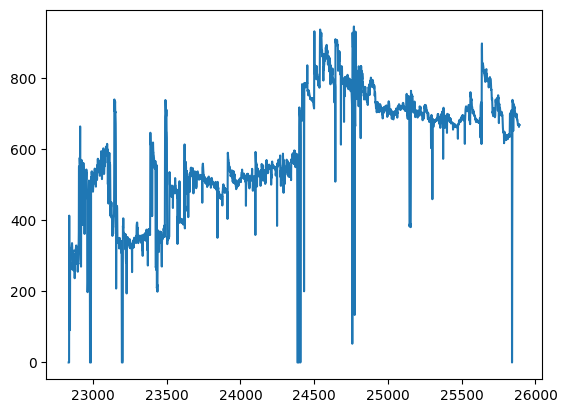

In [47]:
df_inj[df_inj['Well']==12]['Injectivity'].plot()

In [48]:
df_inj[(df_inj['Well']==12) & (df_inj['Injectivity'] == 0)]

,Well,Date,Injectivity,FormationPressure,group
22835,12,1991-06-27,0.0,185.6,I
22836,12,1991-06-28,0.0,185.6,I
22837,12,1991-06-29,0.0,185.6,I
22838,12,1991-06-30,0.0,185.6,I
22980,12,1991-11-19,0.0,238.9,I
22981,12,1991-11-20,0.0,238.9,I
22982,12,1991-11-21,0.0,238.9,I
22983,12,1991-11-22,0.0,238.9,I
22984,12,1991-11-23,0.0,238.9,I
22985,12,1991-11-24,0.0,238.9,I


In [8]:
df_prod = pd.read_excel(Path.joinpath(path_to_raw_data, "Production_wells_train.xlsx"))
df_prod['group'] = 'P'
df_prod

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group
0,0,1987-03-09,47.923,49.001,NaN,57.0,P
1,0,1987-03-10,34.027,34.792,NaN,57.0,P
2,0,1987-03-11,44.988,46.000,NaN,66.0,P
3,0,1987-03-12,44.988,46.000,NaN,63.0,P
4,0,1987-03-13,44.988,46.000,NaN,61.0,P
...,...,...,...,...,...,...,...
24656,114,1991-06-05,11.593,186.999,226.0,223.0,P
24657,114,1991-06-06,11.593,186.999,226.0,223.0,P
24658,114,1991-06-07,11.593,186.999,226.0,223.0,P
24659,114,1991-06-08,10.213,187.707,226.0,224.0,P


In [9]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Well                    24661 non-null  int64         
 1   Date                    24661 non-null  datetime64[ns]
 2   Oil production rate     24661 non-null  float64       
 3   Liquid production rate  24661 non-null  float64       
 4   FormationPressure       20366 non-null  float64       
 5   BottomHolePressure      24508 non-null  float64       
 6   group                   24661 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [11]:
df_prod.describe()

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure
count,24661.000000,24661,24661.000000,24661.000000,20366.000000,24508.000000
mean,62.670330,1990-01-02 03:57:21.758241664,157.177123,206.652408,184.692723,75.665375
min,0.000000,1986-10-17 00:00:00,0.000000,0.000000,122.000000,-1.000000
25%,33.000000,1988-08-09 00:00:00,50.380000,103.996000,162.000000,54.000000
50%,69.000000,1989-08-23 00:00:00,131.009000,182.001000,184.000000,63.000000
75%,92.000000,1991-07-04 00:00:00,226.222000,277.800000,204.000000,81.000000
max,114.000000,1997-07-05 00:00:00,714.286000,715.001000,252.000000,305.000000
std,33.905225,NaN,129.985119,140.076765,26.548583,39.368206


In [10]:
df_prod.Well.nunique()

91

In [51]:
df_prod["water"] = df_prod["Liquid production rate"] - df_prod["Oil production rate"]
df_prod["watercut"] = df_prod["water"] / df_prod["Liquid production rate"]
df_prod["watercut"] = df_prod["watercut"].fillna(0)

In [52]:
df = pd.concat([df_prod, df_inj])
df

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group,water,watercut,Injectivity
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN
...,...,...,...,...,...,...,...,...,...,...
122035,66,1999-11-06,NaN,NaN,NaN,NaN,I,NaN,NaN,204.056372
122036,66,1999-11-07,NaN,NaN,NaN,NaN,I,NaN,NaN,206.872818
122037,66,1999-11-08,NaN,NaN,NaN,NaN,I,NaN,NaN,206.595581
122038,66,1999-11-09,NaN,NaN,NaN,NaN,I,NaN,NaN,207.320831


Посмотрим, как распределены данные по времени для нагнетательных и добывающих скважин.

In [53]:
df[df['group']=='I']['Date'].describe()

count                           122040
mean     1994-08-01 02:58:51.327433728
min                1987-01-10 00:00:00
25%                1992-01-16 00:00:00
50%                1994-09-25 00:00:00
75%                1997-04-29 00:00:00
max                1999-11-10 00:00:00
Name: Date, dtype: object

In [54]:
df[df['group']=='P']['Date'].describe()

count                            24661
mean     1990-01-02 03:57:21.758241664
min                1986-10-17 00:00:00
25%                1988-08-09 00:00:00
50%                1989-08-23 00:00:00
75%                1991-07-04 00:00:00
max                1997-07-05 00:00:00
Name: Date, dtype: object

Нам не пригодятся данные по нагнетатетльным скважинам, датированные позднее последней даты в данных по добывающим скважинам.

In [56]:
latest = df[df['group']=='P']['Date'].max()
df = df[~(df['Date']>latest)]

In [57]:
rename_dict = {"Well": "cat", "Date": "date", "Oil production rate": "oil", "Liquid production rate": "liquid",
              "FormationPressure" : "fp","BottomHolePressure" : "bhp", "Injectivity" : "water_inj"}
df.rename(columns=rename_dict, inplace=True)
df

C:\Users\sonyi\AppData\Local\Temp\ipykernel_13412\1130789557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace=True)


,cat,date,oil,liquid,fp,bhp,group,water,watercut,water_inj
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN
...,...,...,...,...,...,...,...,...,...,...
121178,66,1997-07-01,NaN,NaN,235.0,NaN,I,NaN,NaN,165.728090
121179,66,1997-07-02,NaN,NaN,235.0,NaN,I,NaN,NaN,161.296730
121180,66,1997-07-03,NaN,NaN,235.0,NaN,I,NaN,NaN,163.681567
121181,66,1997-07-04,NaN,NaN,235.0,NaN,I,NaN,NaN,161.297233


<Axes: >

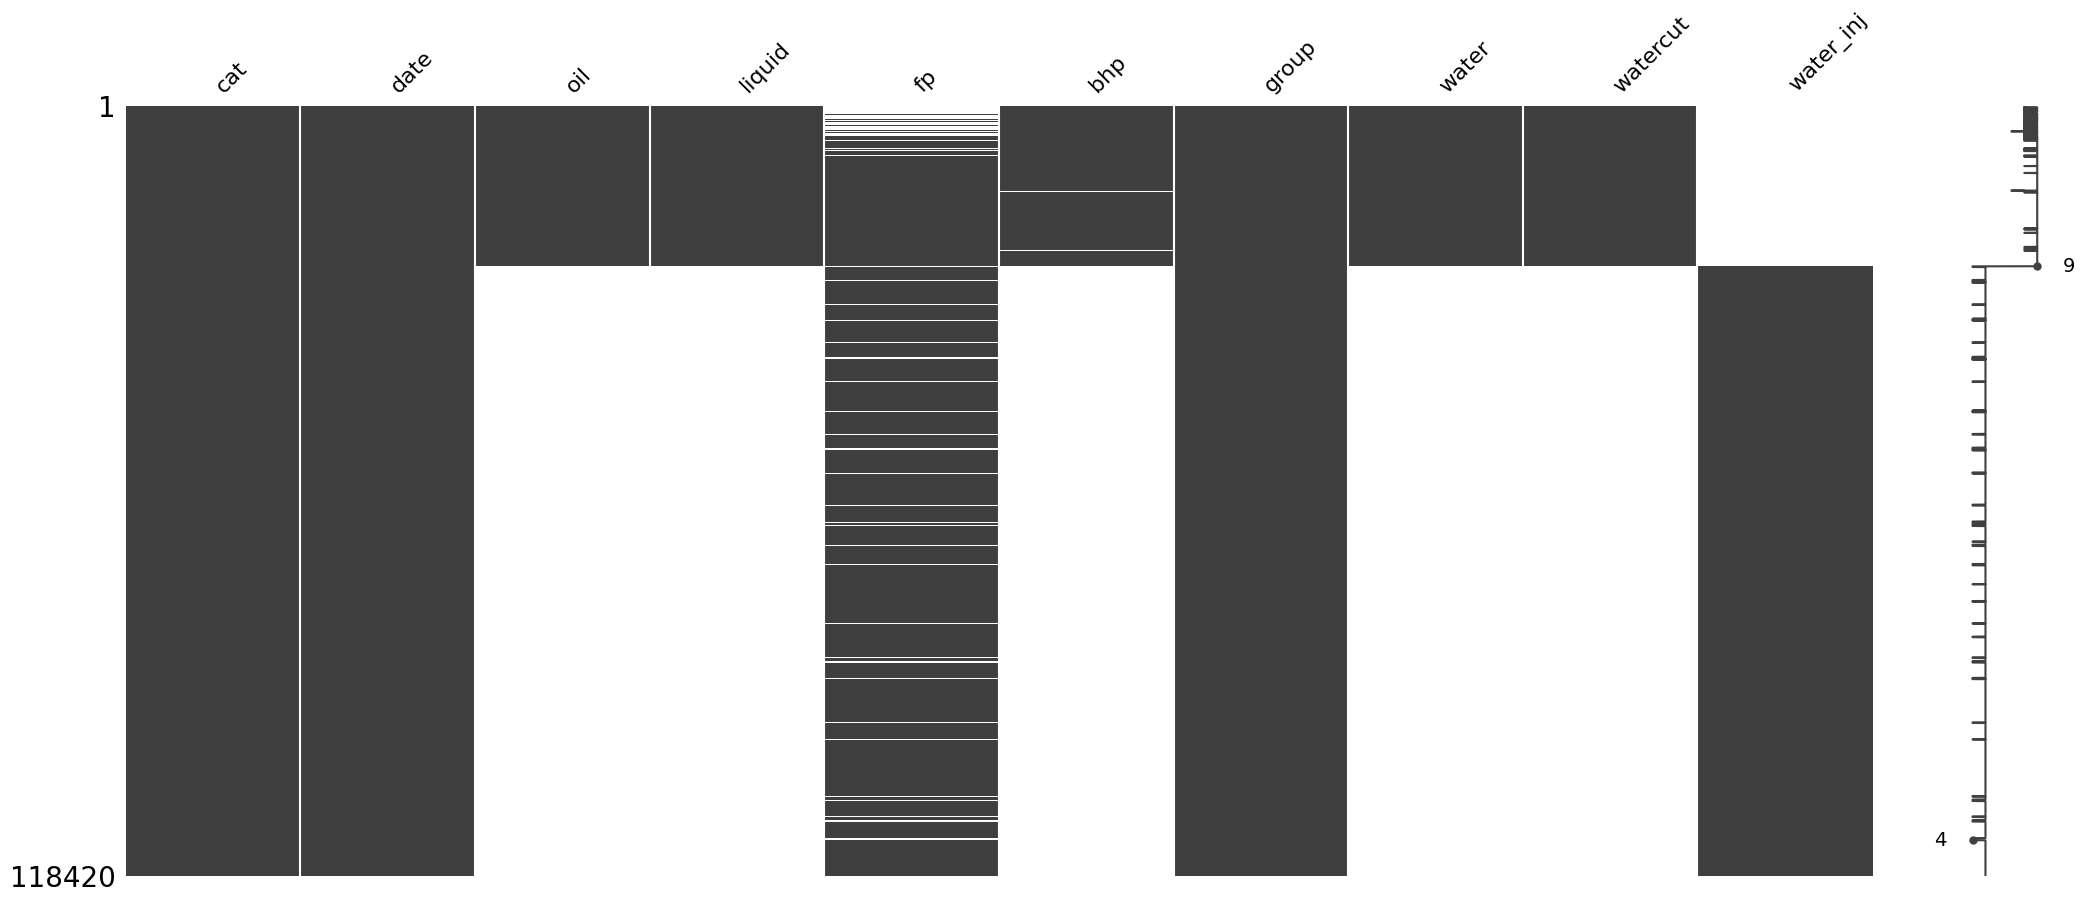

In [58]:
msno.matrix(df)

В колонках bhp(для P) и fp (и для P, и для I) содержатся пропущенные значения. Заполним последним зарегистрированным.

In [59]:
dict_fillna = {'P': ['bhp', 'fp'], 'I': ['fp']}

def fill_nan(df: pd.DataFrame, group) -> pd.DataFrame:
    new_df = df.copy()
    for col in dict_fillna.get(group):
        series = new_df.loc[:, col]
        ref = series.loc[series.first_valid_index()]
        if np.isnan(ref) and (col == 'fp'):
            print("cringe")
        for i, val in series.items():
            if np.isnan(val):
                series.update(pd.Series([ref], index = [i]))
            else:
                ref = val
    return new_df

In [60]:
cats = df['cat'].unique()
groups = ['P', 'I']

In [61]:
for group in groups:
    for cat in cats:
        well = df.loc[(df['cat'] == cat) & (df['group'] == group)]
        if (well.empty):
            continue
        df.loc[(df['cat'] == cat) & (df['group'] == group)] = fill_nan(well, group)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118420 entries, 0 to 121182
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cat        118420 non-null  int64         
 1   date       118420 non-null  datetime64[ns]
 2   oil        24661 non-null   float64       
 3   liquid     24661 non-null   float64       
 4   fp         118420 non-null  float64       
 5   bhp        24661 non-null   float64       
 6   group      118420 non-null  object        
 7   water      24661 non-null   float64       
 8   watercut   24661 non-null   float64       
 9   water_inj  93759 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 9.9+ MB


<Axes: >

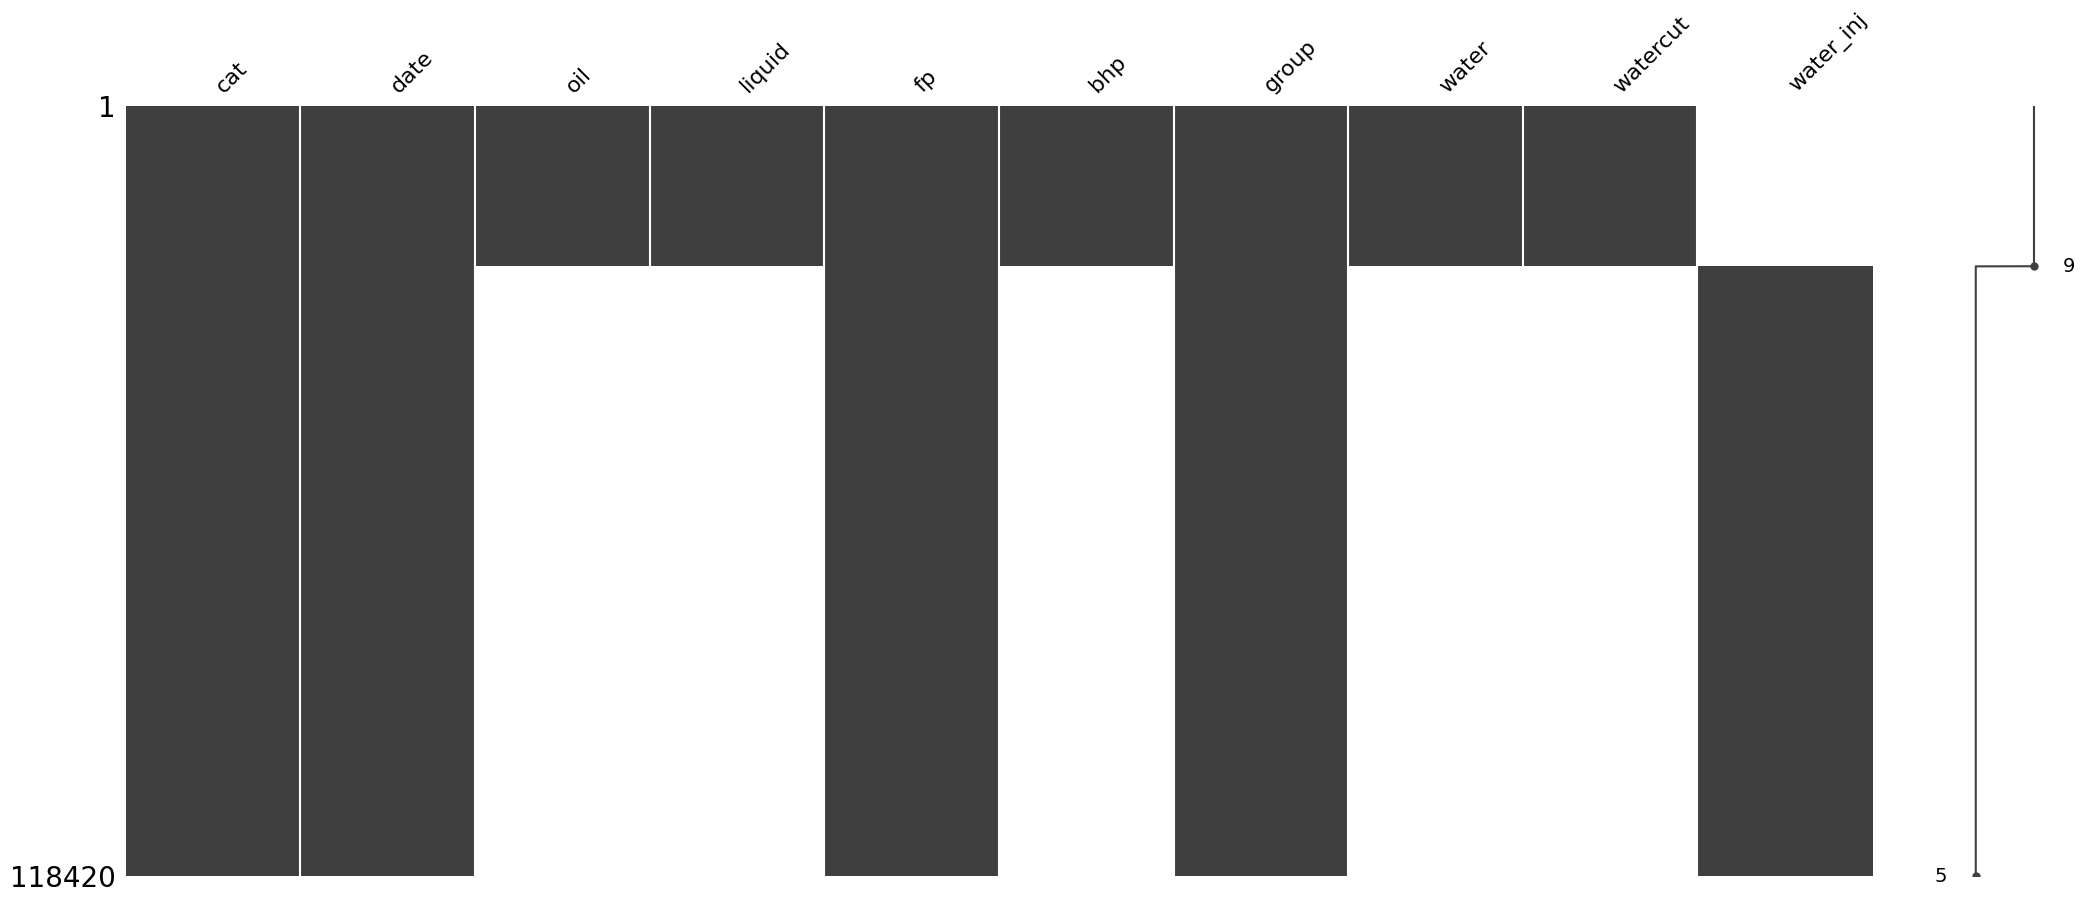

In [63]:
msno.matrix(df)

In [64]:
path = Path.joinpath(
    path_to_processed_data,
    "well_data.csv",
)
df.to_csv(path, index=False)

In [12]:
# create coords dataframe

df_coords = pd.read_excel(Path.joinpath(path_to_raw_data, "Well_coordinates.xlsx"))
df_coords

,Well,X coordinate,Y coordinate
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511
...,...,...,...
110,110,5506,998
111,111,2029,509
112,112,2996,514
113,113,4996,514


In [13]:
df_coords.Well.nunique()

115

In [66]:
rename_dict = {"Well": "cat", "X coordinate": "x", "Y coordinate": "y"}
df_coords.rename(columns=rename_dict, inplace=True)

df_coords.head()

,cat,x,y
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511


In [67]:
path = Path.joinpath(
    path_to_processed_data,
    "coords.csv",
)
df_coords.to_csv(path, index=False)